# Amdahl's Law

<div class="alert alert-warning">
<b>ÜBUNG: </b> Amdahl's Gesetz<br />
<p>Erstellen Sie eine Tabelle/ein Chart, das den maximalen Speedup für folgende Kombinationen zeigt:
<ul>
<li>Prozessoren: 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096</li>
<li>Paralleler Anteil: 50%, 75%, 90%, 95%</li>
</ul>

Wie viel Zeit wird eingespart bei einem Programm mit parallelem Anteil 80%, das auf 1 Prozessor 24 Stunden läuft beim Umstieg von 1 auf 16 Prozessoren? Wie viel beim Umstieg von 16 auf 64 Prozessoren?
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def speedup(parallel_share, n_processors):
    return 1.0 / ((1-parallel_share) + parallel_share / n_processors)

In [2]:
ns = 2**np.arange(0, 13)
ns

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048, 4096], dtype=int32)

In [3]:
df = pd.DataFrame(index=ns)
df

""
1
2
4
8
16
32
64
128
256
512


In [4]:
shares = [0.5, 0.75, 0.9, 0.95]

for share in shares:
    df[share] = [speedup(share, n) for n in ns]

In [5]:
df

,0.50,0.75,0.90,0.95
1,1.000000,1.000000,1.000000,1.000000
2,1.333333,1.600000,1.818182,1.904762
4,1.600000,2.285714,3.076923,3.478261
8,1.777778,2.909091,4.705882,5.925926
16,1.882353,3.368421,6.400000,9.142857
32,1.939394,3.657143,7.804878,12.549020
64,1.969231,3.820896,8.767123,15.421687
128,1.984496,3.908397,9.343066,17.414966
256,1.992218,3.953668,9.660377,18.618182
512,1.996101,3.976699,9.827255,19.284369


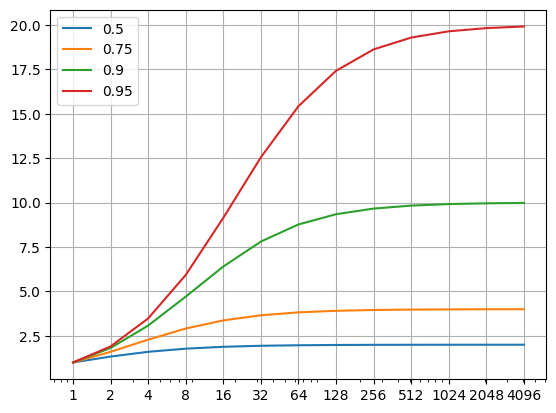

In [6]:
df.plot()
plt.semilogx()
plt.grid()
plt.xticks(ns,ns)
plt.show()

In [7]:
# Wie viel Zeit wird eingespart bei einem Programm mit parallelem Anteil 80%, 
# das auf 1 Prozessor 24 Stunden läuft beim Umstieg von 1 auf 16 Prozessoren? 
# Wie viel beim Umstieg von 16 auf 64 Prozessoren?

laufzeit_orig = 24
laufzeit_neu = 24/speedup(0.8, 16)
einsparung = laufzeit_orig - laufzeit_neu
print(f'Einsparung von 1 auf 16 Prozesoren: {einsparung:.1f} Stunden (von {laufzeit_orig:.1f} auf {laufzeit_neu:.1f} Stunden)')

laufzeit_orig = laufzeit_neu
laufzeit_neu = 24/speedup(0.8, 64)
einsparung = laufzeit_orig - laufzeit_neu
print(f'Einsparung von 16 auf 64 Prozesoren: {einsparung:.1f} Stunden (von {laufzeit_orig:.1f} auf {laufzeit_neu:.1f} Stunden)')


Einsparung von 1 auf 16 Prozesoren: 18.0 Stunden (von 24.0 auf 6.0 Stunden)
Einsparung von 16 auf 64 Prozesoren: 0.9 Stunden (von 6.0 auf 5.1 Stunden)


## Heterogenes Computing

<div class="alert alert-warning">
<b>ÜBUNG: </b> Amdahl's Gesetz mit heterogenen Prozessoren<br />
<p>Betrachten wir einen Prozessor mit einem Kern für sequenzielle Aufgaben und 4 Kernen für parallele Aufgaben. Aufgrund von technologischen Entwicklungen können Sie bei der nächsten Prozessorgeneration entweder den Kern für sequenzielle Aufgaben doppelt so schnell machen (A) oder die Anzahl der Kerne für parallele Aufgaben verdopplen (B). Wofür entscheiden Sie sich (d.h. wie hoch ist der jeweilige Speedup), wenn der typische Workload einen parallelen Anteil von 25%, 50%, 75%, 90% oder 95% hat?
</div>

In [8]:
parallel = [0.25, 0.5, 0.75, 0.9, 0.95]

def speedup4to8(p):
    return ((1-p) + p / 4) / ((1-p) + p / 8)

def speedup2xSeq(p):
    return ((1-p) + p / 4) / ((1-p)/2 + p / 4)

print('Parallel | Speedup A | Speedup B')
for p in parallel:
    print(f'    {p:4.2f} |      {speedup2xSeq(p):4.1f} |      {speedup4to8(p):4.1f}')

Parallel | Speedup A | Speedup B
    0.25 |       1.9 |       1.0
    0.50 |       1.7 |       1.1
    0.75 |       1.4 |       1.3
    0.90 |       1.2 |       1.5
    0.95 |       1.1 |       1.7
